# <center>Email Spam Classification 

<img src="img/spam.jpg" />

### The nootebooks outline:

* Quick dataset overview
* Text cleaning
* EDA(Exploratinary Data Analysis)
* Feature extraction

### We'll be using dataset from Kaggle(https://www.kaggle.com/nitishabharathi/email-spam-dataset)

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

## <center> Quick dataset overview

In [3]:
data1 = pd.read_csv('data/lingSpam.csv')
data2 = pd.read_csv('data/enronSpamSubset.csv')
data3 = pd.read_csv('data/completeSpamAssassin.csv')

In [4]:
data1.head(5)

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [6]:
data2.head(5)

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Unnamed: 0.1  10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [8]:
data3.head(5)

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [9]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


We'll start by removing columns that contain serial numbers.
<p>

In [10]:
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

Concatenate them

In [11]:
data = pd.concat([data1,data2,data3],axis=0)
data.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18651 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [13]:
#1 for spam and 0 for ham
data['Label'].value_counts()

0    11322
1     7329
Name: Label, dtype: int64

In [14]:
#count of NaN values
data.isna().sum()

Body     1
Label    0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data['Body'] = data['Body'].astype('string')
data.dtypes

Body     string
Label     int64
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  string
 1   Label   18650 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 437.1 KB


In [18]:
#we'll be used this later
x_4_eda = data['Body'].tolist()

## <center> Cleaning and Feature Extraction

<font size="4">So, what are our options?</font>

* Lowering
* Cleaning links
* Remove spec symbols and punctuation
* Remove nums + words containing numbers and detached letters
* Tokenizing
* Lemmatizing and Removing Stopwords
* Word Embedding

### Lowering:

In [19]:
import re
import string

x = data['Body']
x_low = [email.lower() for email in x]
x_low[10]

'subject: the best , just got better\n \n the 2 newest and hottest interactive adult web sites will soon be the largest ! ! ! check out both of the following adult web sites free samples and trial memberships ! ! ! ! live triple x adult entertainment and pictures . new content added weekly ! ! ! girls , boys , couples , and more ! ! ! check them both out : http : / / www2 . dirtyonline . com http : / / www . chixchat . com\n'

### Cleaning links

Emails frequently include links like https://www.google.com and others, which can later cause issues with model effectiveness.
In order to solve this problem, we'll be traditionally using regular expression. Our case:

<img src="img/link.png" />

In [20]:
x_low[10]

'subject: the best , just got better\n \n the 2 newest and hottest interactive adult web sites will soon be the largest ! ! ! check out both of the following adult web sites free samples and trial memberships ! ! ! ! live triple x adult entertainment and pictures . new content added weekly ! ! ! girls , boys , couples , and more ! ! ! check them both out : http : / / www2 . dirtyonline . com http : / / www . chixchat . com\n'

In [21]:
x_link_cl = [re.sub(r"http\s.\s.\s.\s\S+\s.\s\S+\s.\s\S+", "", text) for text in x_low]
x_link_cl[10]

'subject: the best , just got better\n \n the 2 newest and hottest interactive adult web sites will soon be the largest ! ! ! check out both of the following adult web sites free samples and trial memberships ! ! ! ! live triple x adult entertainment and pictures . new content added weekly ! ! ! girls , boys , couples , and more ! ! ! check them both out :  \n'

### Remove spec symbols and punctuation

In [22]:
x_link_cl[0]

'subject: great part-time or summer job !\n \n * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-8

In [23]:
x_digts_cl = [re.sub("[^a-zA-Z0-9]"," ",text) for text in x_link_cl]
x_digts_cl[0]

'subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888

### Remove nums + words containing numbers and detached letters

In [24]:
x_digts_cl[0]

'subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888

In [25]:
x_nm_cl = list(map(lambda words: ' '.join(s for s in words.split() if not any(c.isdigit() for c in s)), x_digts_cl))
x_nm_cl[0]

'subject great part time or summer job we have display boxes with credit applications that we need to place in the small owner operated stores in your area here is what you do introduce yourself to the store owner or manager use our effective script which tells them how this little display box will save their customers hundreds of dollars be a drawing card for their business and make them from to or more for every app sent in find a good spot on the counter place the box there and say that nothing more need be done all you need is his name and address so the company can send him the commission checks your compensaation will be for every box you place by becoming a representative you could also earn a commission of for each application that came from that store that is of course a much more profitable plan as it will pay you for months or years for a very small effort call code hours to receive the details to be removed from our mailing list type hotmail com in the to area and remove in

In [26]:
x_final_cl = list(map(lambda words: ' '.join(s for s in words.split() if len(s) > 1), x_nm_cl))
x_final_cl[0]

'subject great part time or summer job we have display boxes with credit applications that we need to place in the small owner operated stores in your area here is what you do introduce yourself to the store owner or manager use our effective script which tells them how this little display box will save their customers hundreds of dollars be drawing card for their business and make them from to or more for every app sent in find good spot on the counter place the box there and say that nothing more need be done all you need is his name and address so the company can send him the commission checks your compensaation will be for every box you place by becoming representative you could also earn commission of for each application that came from that store that is of course much more profitable plan as it will pay you for months or years for very small effort call code hours to receive the details to be removed from our mailing list type hotmail com in the to area and remove in the subject

## <center> Exploratory Data Analysis </center>

Let's take a look at a visual representation of our dataset and introduce some extra features before we continue to prepare our data for a learning process.

In [27]:
data['Body'] = x_final_cl
data['Body'] = data['Body'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  string
 1   Label   18650 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 437.1 KB


### Based on an unclean text, we'll add new features like:

* Count of punctuation marks in each message
* Count of capital letters in each message
* Count of numerical digits in each message

Count of punctuation marks in each message:

In [28]:
data['punct_count'] = [len(re.findall("[!#$%&\'()+,-./:;<=>?@[\\]^_`{|}~]",text)) for text in x_link_cl]

Count of capital letters in each message:

In [29]:
def count_capital(words):
    return (len(list(filter(lambda x:x.isupper(), list(words)))))

In [30]:
data['cl_count'] = list(map(count_capital, x_4_eda))

Count of numerical digits in each message:

In [31]:
def count_nums(words):
    return (len(list(filter(lambda x:x.isdigit(), list(words)))))

In [32]:
data['nums_count'] = list(map(count_nums, x_digts_cl)) 

Count of stopwords

In [33]:
import nltk
#nltk.download('stopwords')

In [34]:
stopwords = nltk.corpus.stopwords.words("english")

In [35]:
def count_stopw(words):
    return (len(list(filter(lambda x:x in stopwords, list(words)))))

In [36]:
data['st_word_count'] = list(map(count_stopw, x_final_cl))

### Also, add message length as a new feature

In [37]:
data['length'] = list(map(len, data['Body'])) 

In [38]:
data.head(5)

,Body,Label,punct_count,cl_count,nums_count,st_word_count,length
0,subject great part time or summer job we have ...,1,44,1,34,398,1025
1,subject auto insurance rates too high dear nlp...,1,33,1,11,420,1115
2,subject do want the best and economical huntin...,1,39,1,33,210,554
3,subject email million people for million email...,1,426,1,151,1480,3717
4,subject do miss these attention warning adults...,1,749,1,157,1830,4837


In [39]:
data.groupby("Label").describe()

punct_count                                                             \
            count        mean          std  min   25%   50%    75%       max   
Label                                                                          
0         11322.0  209.562180  9327.848384  0.0  23.0  61.0  136.0  992077.0   
1          7328.0   85.185044   214.327190  0.0  12.0  30.0   76.0    3449.0   

      cl_count             ... st_word_count              length               \
         count       mean  ...           75%        max    count         mean   
Label                      ...                                                  
0      11322.0  28.377407  ...         654.0  5456331.0  11322.0  2911.713302   
1       7328.0  50.022789  ...         496.0    27370.0   7328.0  1336.870770   

                                                               
                 std  min     25%    50%      75%         max  
Label                                                          
0      131006.495681  5.0  367.00  815.0  1694.75  13934235.0  
1        2554.837512  0.0  297.75  588.0  1287.25     68889.0  

[2 rows x 40 columns]

In [40]:
data["Body"].describe()

count     18650
unique    17068
top       empty
freq        533
Name: Body, dtype: object

We'll get rid of the duplicates

In [41]:
data[data["Body"].duplicated()]

,Body,Label,punct_count,cl_count,nums_count,st_word_count,length
154,subject they can even steal your identity are ...,1,662,1,160,2104,5394
158,subject just released million it was just rele...,1,855,1,150,1870,4848
159,subject free trial membership the latest in ad...,1,18,1,7,102,293
183,subject just released million it was just rele...,1,855,1,150,1870,4848
270,subject re the virtual girlfriend and virtual ...,1,493,1,106,1717,4368
...,...,...,...,...,...,...,...
6038,empty,0,0,0,0,3,5
6040,empty,0,0,0,0,3,5
6041,empty,0,0,0,0,3,5
6044,empty,0,0,0,0,3,5


In [42]:
data = data.drop_duplicates(subset = ['Body'])

In [43]:
data.groupby("Label").describe()

punct_count                                                             \
            count        mean          std  min   25%   50%    75%       max   
Label                                                                          
0         10668.0  219.532340  9609.328835  1.0  27.0  66.0  141.0  992077.0   
1          6400.0   88.857812   219.711910  0.0  14.0  31.0   80.0    3449.0   

      cl_count             ... st_word_count              length               \
         count       mean  ...           75%        max    count         mean   
Label                      ...                                                  
0      10668.0  29.921541  ...        682.00  5456331.0  10668.0  3040.450319   
1       6400.0  49.856875  ...        525.25    27370.0   6400.0  1404.825938   

                                                               
                 std   min    25%    50%      75%         max  
Label                                                          
0      134956.815794  15.0  412.0  867.0  1762.25  13934235.0  
1        2624.783263   0.0  323.0  622.0  1369.00     68889.0  

[2 rows x 40 columns]

In [44]:
data["Body"].describe()

count                                                 17068
unique                                                17068
top       subject thanks for yesterady you have to know ...
freq                                                      1
Name: Body, dtype: object

### Logarithmic transformation 

In [45]:
features = list(
    set(data.columns)
    - {
        "Body",
        "Label",
    })
data[features] = data[features].apply(np.log1p)

In [46]:
data.groupby("Label").describe()

punct_count                                                              \
            count      mean       std       min       25%       50%       75%   
Label                                                                           
0         10668.0  4.135729  1.187071  0.693147  3.332205  4.204693  4.955827   
1          6400.0  3.576009  1.259558  0.000000  2.708050  3.465736  4.394449   

                 cl_count            ... st_word_count              length  \
             max    count      mean  ...           75%        max    count   
Label                                ...                                     
0      13.807557  10668.0  1.758070  ...      6.526495  15.512287  10668.0   
1       8.146130   6400.0  1.430109  ...      6.265776  10.217239   6400.0   

                                                                              
           mean       std       min       25%       50%       75%        max  
Label                                                                         
0      6.753298  1.141506  2.772589  6.023448  6.766192  7.474914  16.449859  
1      6.520954  1.167814  0.000000  5.780744  6.434547  7.222566  11.140266  

[2 rows x 40 columns]

In [47]:
data.head(5)

,Body,Label,punct_count,cl_count,nums_count,st_word_count,length
0,subject great part time or summer job we have ...,1,3.806662,0.693147,3.555348,5.988961,6.933423
1,subject auto insurance rates too high dear nlp...,1,3.526361,0.693147,2.484907,6.042633,7.017506
2,subject do want the best and economical huntin...,1,3.688879,0.693147,3.526361,5.351858,6.318968
3,subject email million people for million email...,1,6.056784,0.693147,5.023881,7.300473,8.220941
4,subject do miss these attention warning adults...,1,6.620073,0.693147,5.062595,7.512618,8.484257


### Distribution of the target variable

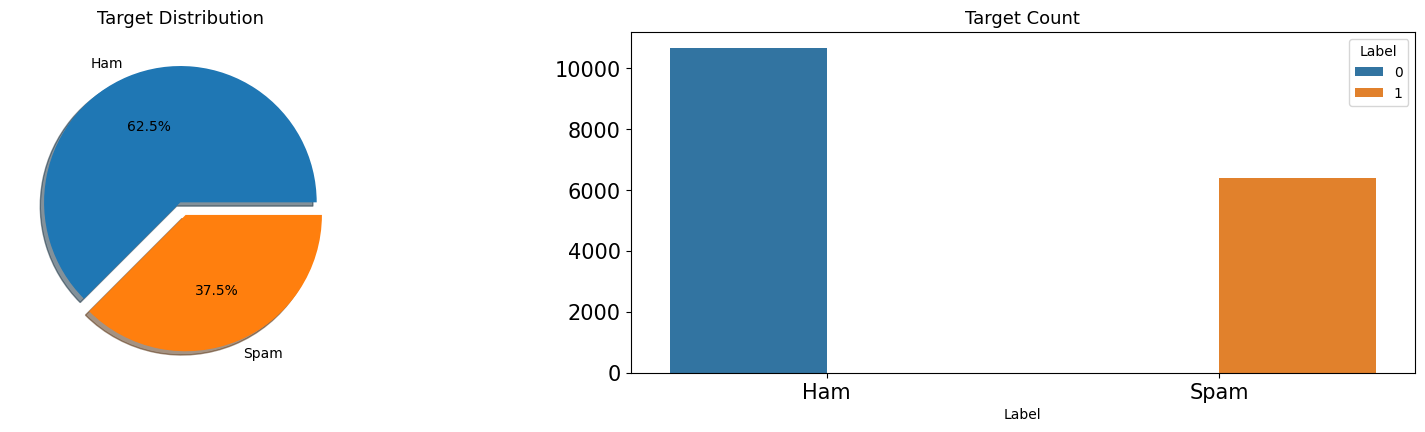

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

data.groupby('Label')['Body'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')
sns.countplot(x=data['Label'], hue=data['Label'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Ham', 'Spam'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Target Count', fontsize=13)

plt.show()

### WordCloud

Maybe not very useful, but it's still pretty cool

In [49]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

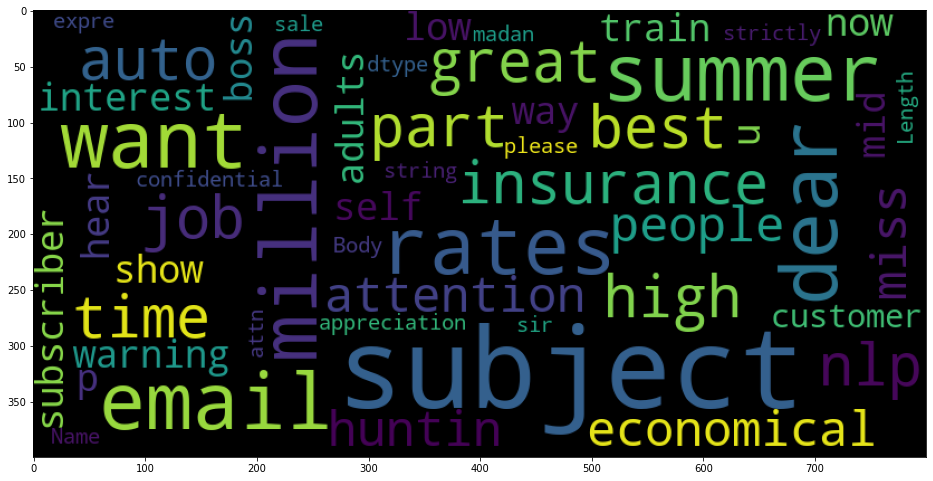

In [50]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(data.loc[data['Label'] == 1, 'Body']))
plt.imshow(wordcloud);

#### <center> For Spam</center>

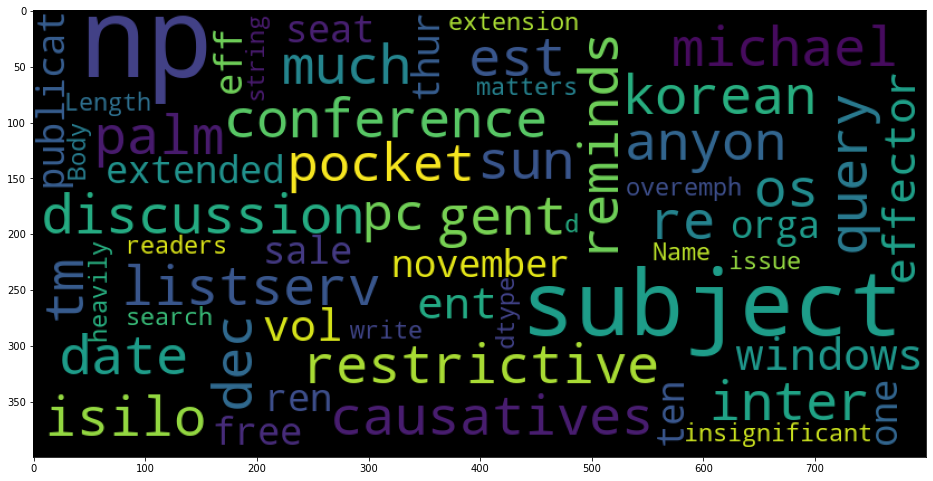

In [51]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(data.loc[data['Label'] == 0, 'Body']))
plt.imshow(wordcloud);

#### <center> For Ham</center>

### Let's get information from our's features

### Correlation matrix

In [52]:
data.columns

Index(['Body', 'Label', 'punct_count', 'cl_count', 'nums_count',
       'st_word_count', 'length'],
      dtype='object')

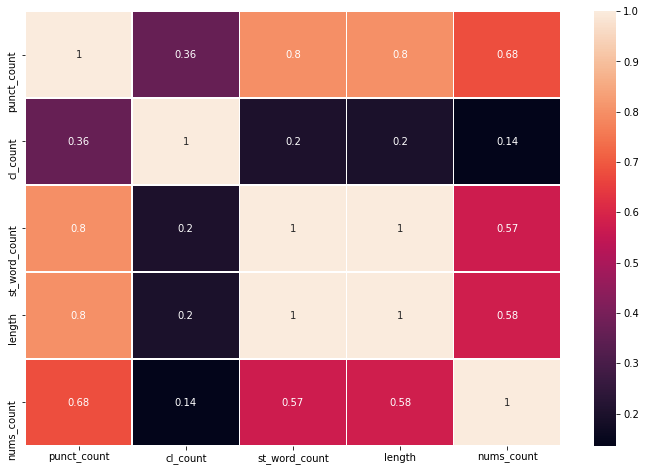

In [53]:
features = list(
    set(data.columns)
    - {
        "Body",
        "Label",
    }
)

plt.figure(figsize=(12, 8))
# Calculate and plot
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, linewidths=.5, annot=True);

On the correlation matrix, we can see that there is a pair of features, such as (st word count,length), that dependency

Let's look at their distribution and pairplot 

F:\anaconda3\envs\crp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


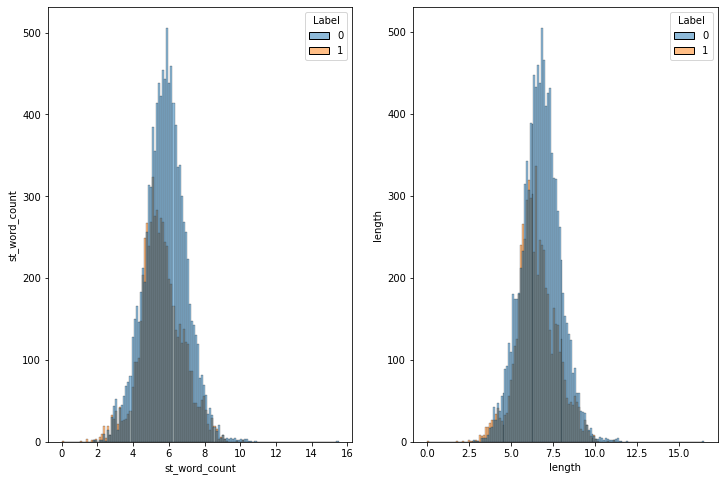

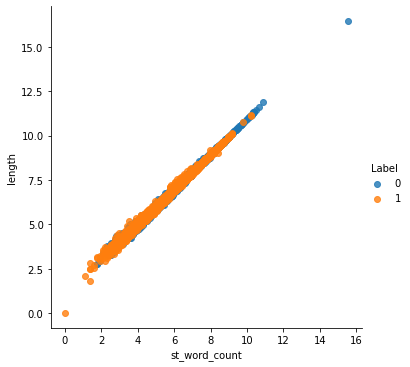

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(data, ax=axes[0], x="st_word_count", hue = "Label")
axes[0].set_ylabel("st_word_count")
sns.histplot(data, ax=axes[1], x="length", hue = "Label")
axes[1].set_ylabel("length")
sns.lmplot("st_word_count", "length", data=data, hue="Label", fit_reg=False)

As a result, one of these features will be removed. Because the distribution of st word count for the "Ham" class has a more right-side shift than the distribution of "length" for the "Ham" class, I prefer to drop length

In [55]:
data.drop('length',axis = 1, inplace=True)

### Boxplot

Let's create a boxplot of all features

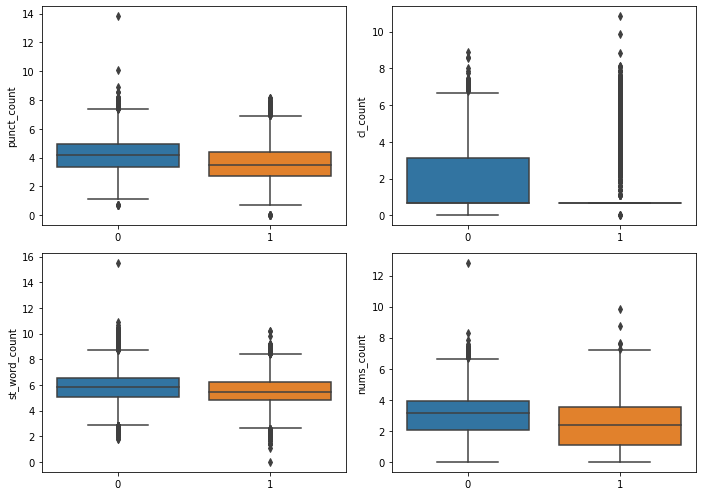

In [56]:
features = list(
    set(data.columns)
    - {
        "Body",
        "Label",
    }
)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(x="Label", y=feat, data=data, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

Consider outliers 

In [57]:
data[data["cl_count"] >= 9]["Body"].values

<StringArray>
['bm to fma zzzzason org content type multipart mixed boundary nextpart charset mime version reply to webmaster szdrx com date thu sep priority mailer ehoosend is multi part message in mime format nextpart content type text plain content transfer encoding http www dowell com the china international electronic equipments and components surface mounting technology fair time april to add china hi tech fair exhibition centre shenzhen approver ministry of science and technology of people republic of china sponsors chinese institute of electronics cie co organizer china semiconductor association china electronics news agency organizer exhibition dept of chinese institute of electronics shenzhen dowell industrial co ltd usd usd usd rmb rmb rmb rmb rmb website www dowell com www szdrx com mail webmaster szdrx com nextpart content type application octet stream name jpg content transfer encoding content disposition attachment filename jpg zynt wfd zq ahebaxeb eaeyqaaicaqidawofawieb

We'll drop them using z-score

In [58]:
data.shape

(17068, 6)

In [59]:
from scipy import stats
zf = pd.DataFrame(np.abs(stats.zscore(data[features])), columns= features)
zf.head(5)

,punct_count,cl_count,st_word_count,nums_count
0,0.095769,0.600687,0.239625,0.546208
1,0.320993,0.600687,0.285347,0.138682
2,0.190408,0.600687,0.303123,0.527661
3,1.712222,0.600687,1.356899,1.485804
4,2.164829,0.600687,1.537625,1.510574


In [60]:
z_out = zf[(zf < 3).all(axis=1)]

In [61]:
z_out.shape

(16838, 4)

In [62]:
data = data[(np.abs(stats.zscore(data[features])) < 3).all(axis=1)]

In [63]:
data.shape

(16838, 6)

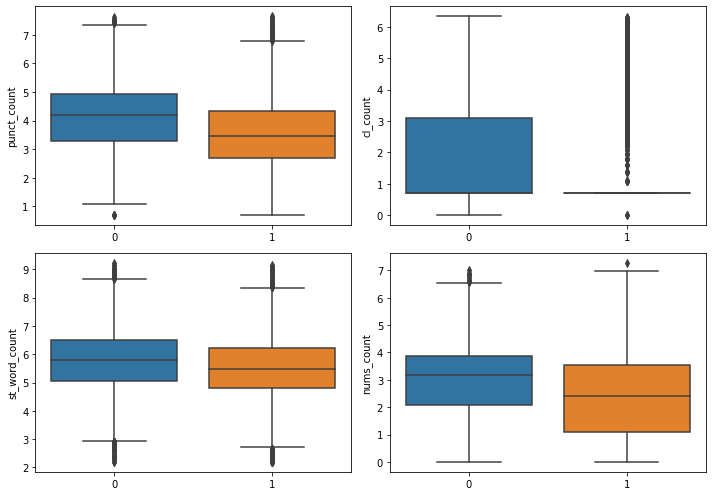

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(x="Label", y=feat, data=data, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

### Distributions 

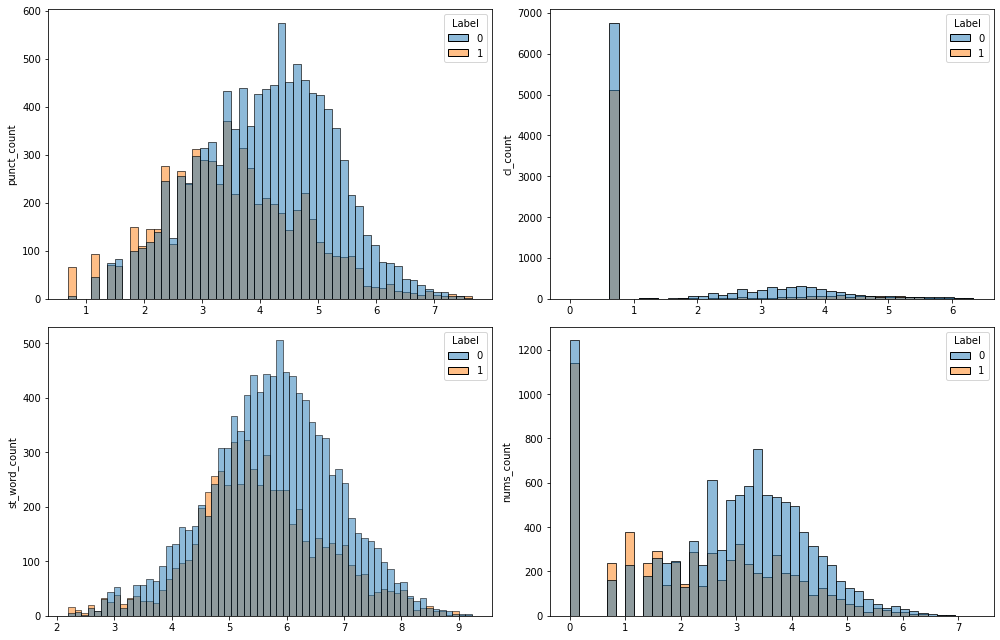

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
for idx, feat in enumerate(features):
    ax = axes[int(idx / 2), idx % 2]
    sns.histplot(data, ax=ax, x=feat, hue = "Label")
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

Next, I would like to take a closer look to "cl_count" distribution

We can see, that the most of our values are same, but let's zoom the right side of distribution and build violin plot

<AxesSubplot:xlabel='Label', ylabel='cl_count'>

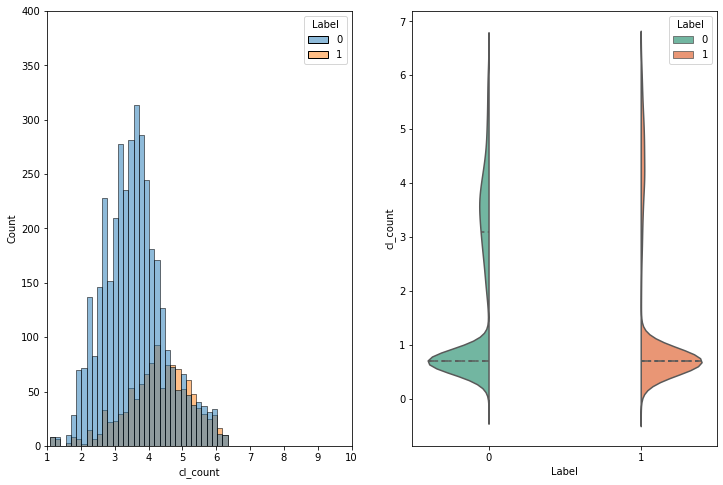

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_xlim([1,10])
axes[0].set_ylim([0,400])
sns.histplot(data, ax=axes[0], x="cl_count", hue = "Label")
sns.violinplot(x="Label", y="cl_count", hue="Label",
               data=data, palette="Set2", split=True,
               scale="count", inner="quartile", ax=axes[1])

There is no big difference, but we'll take a look at the proportions of each class on the most popular value

In [67]:
#mode of our feature
data['cl_count'].mode()

0    0.693147
dtype: float64

In [68]:
values = data[data["cl_count"] == data['cl_count'].mode()[0]].groupby('Label')["cl_count"].count()
values

Label
0    6748
1    5122
Name: cl_count, dtype: int64

Let's revisit the target variable's distribution and draw distributions for the mode's values and others based on the target variable's distribution

Text(0.5, 1.0, 'Others by target')

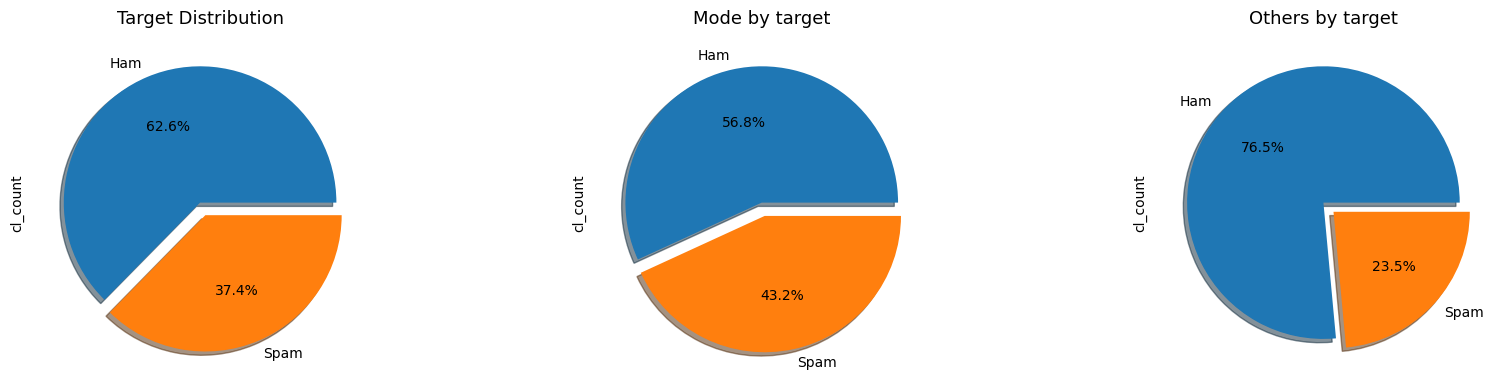

In [69]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), dpi=100)
plt.tight_layout()

data.groupby('Label')['cl_count'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')

data[data["cl_count"] == data['cl_count'].mode()[0]].groupby('Label')["cl_count"].count().plot(kind='pie', 
                                                                    ax=axes[1], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')

data[data["cl_count"] != data['cl_count'].mode()[0]].groupby('Label')["cl_count"].count().plot(kind='pie', 
                                                                    ax=axes[2], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')
    
axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Mode by target', fontsize=13)
axes[2].set_title('Others by target', fontsize=13)

Pretty similar situation with the nums_count feature

Text(0.5, 1.0, 'Others by target')

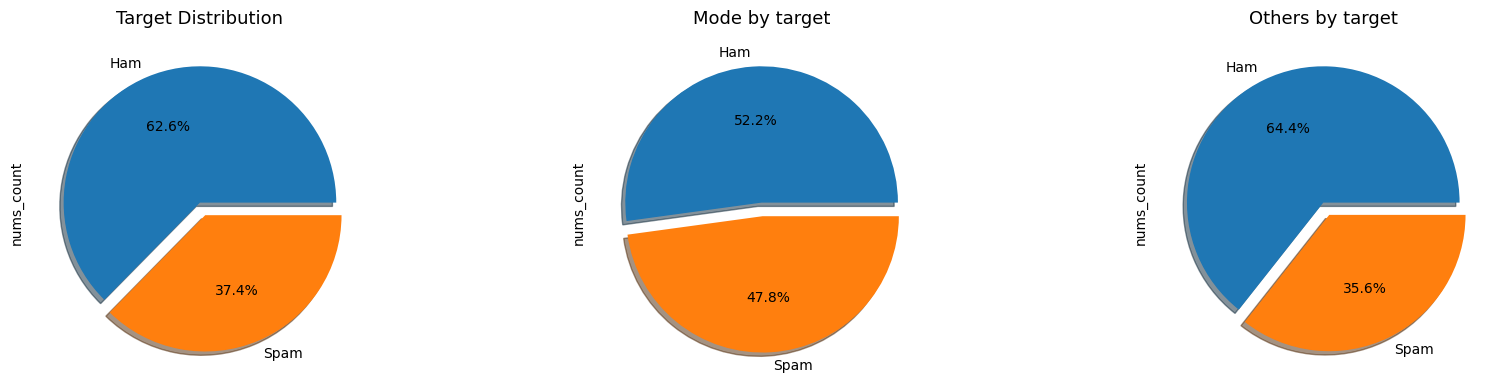

In [70]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), dpi=100)
plt.tight_layout()

data.groupby('Label')['nums_count'].count().plot(kind='pie', ax=axes[0], labels=['Ham', 'Spam'], 
                                           shadow=True, explode=[0,0.1], autopct='%1.1f%%')

data[data["nums_count"] == data['nums_count'].mode()[0]].groupby('Label')["nums_count"].count().plot(kind='pie', 
                                                                    ax=axes[1], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')

data[data["nums_count"] != data['nums_count'].mode()[0]].groupby('Label')["nums_count"].count().plot(kind='pie', 
                                                                    ax=axes[2], labels=['Ham', 'Spam'], 
                                                                    shadow=True, explode=[0,0.1], autopct='%1.1f%%')
    
axes[0].set_title('Target Distribution', fontsize=13)
axes[1].set_title('Mode by target', fontsize=13)
axes[2].set_title('Others by target', fontsize=13)

As we can see in histograms and piecharts, the values of cl_count and nums_count depending on the classes have not only a shift, but also a proportional deviation from the general trend.

### Heatmap with target variable

Finally, let's create a heatmap with our target variable.

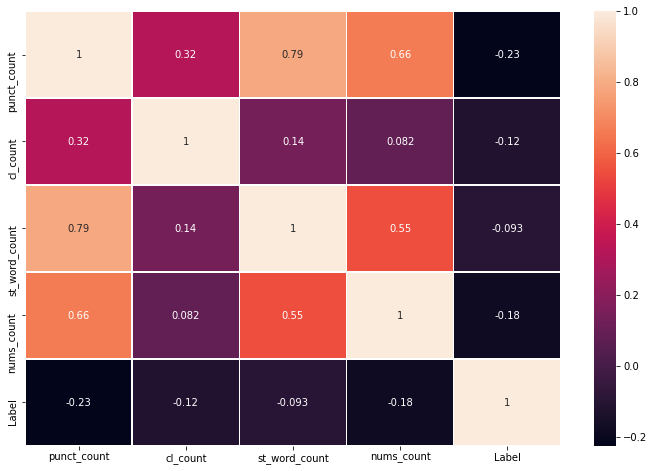

In [71]:
features.append("Label")

plt.figure(figsize=(12, 8))
# Calculate and plot
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, linewidths=.5, annot=True);

## <center>Feature extraction</center>

<b>Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning

Further steps:

* Tokenization + stopwords cleaning
* Lemmatizing
* Vectorization 
* TF-IDF weighting

### Tokenization + stopwords cleaning

#### Stopwords

from sklearn documentation: https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text,
and which may be removed to avoid them being construed as signal for prediction.
Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

Let's begin by defining a function that we'll use in the Vectorization section later.

In [72]:
test_text = data["Body"].values[0:2]
test_text

<StringArray>
['subject great part time or summer job we have display boxes with credit applications that we need to place in the small owner operated stores in your area here is what you do introduce yourself to the store owner or manager use our effective script which tells them how this little display box will save their customers hundreds of dollars be drawing card for their business and make them from to or more for every app sent in find good spot on the counter place the box there and say that nothing more need be done all you need is his name and address so the company can send him the commission checks your compensaation will be for every box you place by becoming representative you could also earn commission of for each application that came from that store that is of course much more profitable plan as it will pay you for months or years for very small effort call code hours to receive the details to be removed from our mailing list type hotmail com in the to area and remove

In [73]:
#nltk.download('punkt')

In [74]:
x_tokenized = [nltk.word_tokenize(text) for text in test_text]
x_tokenized

[['subject',
  'great',
  'part',
  'time',
  'or',
  'summer',
  'job',
  'we',
  'have',
  'display',
  'boxes',
  'with',
  'credit',
  'applications',
  'that',
  'we',
  'need',
  'to',
  'place',
  'in',
  'the',
  'small',
  'owner',
  'operated',
  'stores',
  'in',
  'your',
  'area',
  'here',
  'is',
  'what',
  'you',
  'do',
  'introduce',
  'yourself',
  'to',
  'the',
  'store',
  'owner',
  'or',
  'manager',
  'use',
  'our',
  'effective',
  'script',
  'which',
  'tells',
  'them',
  'how',
  'this',
  'little',
  'display',
  'box',
  'will',
  'save',
  'their',
  'customers',
  'hundreds',
  'of',
  'dollars',
  'be',
  'drawing',
  'card',
  'for',
  'their',
  'business',
  'and',
  'make',
  'them',
  'from',
  'to',
  'or',
  'more',
  'for',
  'every',
  'app',
  'sent',
  'in',
  'find',
  'good',
  'spot',
  'on',
  'the',
  'counter',
  'place',
  'the',
  'box',
  'there',
  'and',
  'say',
  'that',
  'nothing',
  'more',
  'need',
  'be',
  'done',
  'a

In [75]:
def tokenize_and_clean_stopwords(email):

    email_tokens = [nltk.word_tokenize(text) for text in email]
    
    email_tokens_no_stopwords = \
        [[word for word in text if word not in stopwords] for text in email_tokens]
        
    return email_tokens_no_stopwords

In [76]:
test_tokens = tokenize_and_clean_stopwords(test_text)

### Lemmatizing

Words in natural languages can obtain various meanings, resulting in a large number of versions for each word. These additionals may provide us with useful information, but we don't need them when filtering spam

There are two ways to solve this:

* <b>Stemming</b> algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations. Below we illustrate the method with examples in both English and Spanish.


<img src="img/stemm.png" />

* <b>Lemmatization</b>, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

<img src="img/lemma.png" />

In this nootebook we'll use NLTK's WordNet Lemmatizer. WordNet is a big dictionary.

In [77]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [316]:
#test_tokens

Let's redefine our function <b>tokenize_and_clean_stopwords</b> and add lemmatization

In [79]:
def tokenize_and_lemma(email):

    email_tokens = [nltk.word_tokenize(text) for text in email]
    
    email_tokens_no_stopwords = \
        [[word for word in text if word not in stopwords] for text in email_tokens]
        
    email_lemm = [[lemma.lemmatize(word) for word in text] for text in email_tokens_no_stopwords]
    
    return email_tokens_no_stopwords

In [80]:
text_lemm = tokenize_and_lemma(test_text)
#text_lemm

### Top 30 ham and spam words in messages 

In [81]:
data_ham = data[data["Label"] == 0]["Body"].to_list()
data_spam = data[data["Label"] == 1]["Body"].to_list()

In [82]:
words_ham = tokenize_and_lemma(data_ham)
words_spam = tokenize_and_lemma(data_spam)

In [83]:
data["Label"].value_counts()

0    10547
1     6291
Name: Label, dtype: int64

In [84]:
len(words_ham)

10547

In [85]:
len(words_spam)

6291

In [86]:
list_ham_words = []
for sublist in words_ham:
    for item in sublist:
        list_ham_words.append(item)

In [87]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [88]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [89]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['word', 'count'])

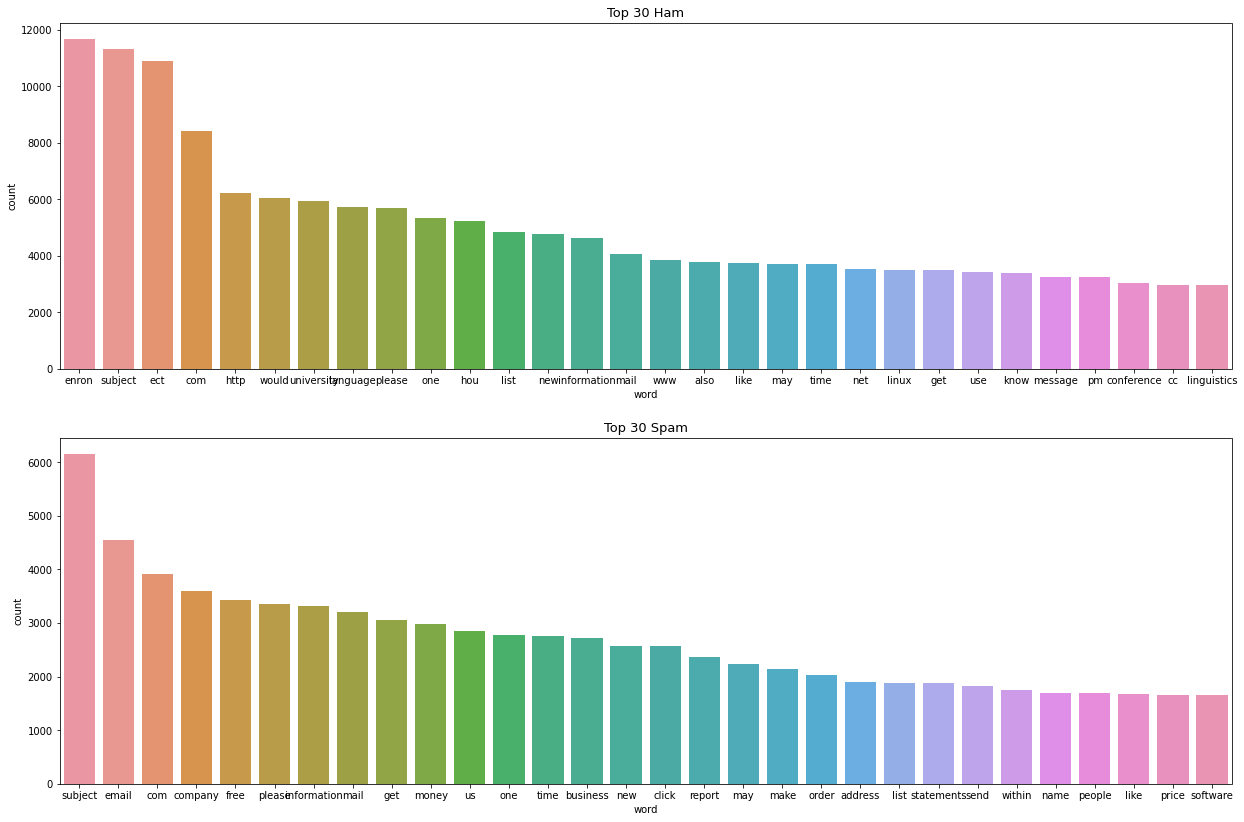

In [90]:
fig, axes = plt.subplots(nrows=2, figsize=(21, 14))
#plt.tight_layout()

sns.barplot(x='word', y='count', 
            data=df_hamwords_top30_nltk, ax=axes[0]);

sns.barplot(x='word', y='count', 
            data=df_spamwords_top30_nltk, ax=axes[1]);

axes[0].set_title('Top 30 Ham', fontsize=13)
axes[1].set_title('Top 30 Spam', fontsize=13)

plt.show()

### Vectorization

Machine learning algorithms are used extensively in the field of text analysis. However, because most algorithms expect numerical feature vectors of a fixed size rather than raw text documents of variable length, the raw data, a sequence of symbols, cannot be fed directly to them.
To address this, scikit-learn includes utilities for the most common methods of extracting numerical features from text, including:

* <b>Tokenization</b>

* <b>Vectorization:</b> 
    Counting the occurrences of tokens in each document.
* <b>TF-IDF:</b> 
    Normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

For the vectorization task, we'll be using the Bag of Words (BoW) model.

In this scheme, features and samples are defined as follows: each individual token occurrence frequency (normalized or not) is treated as a feature.
the vector of all the token frequencies for a given document is considered a multivariate sample.
A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
We call vectorization the general process of turning a collection of text documents into numerical feature vectors.

For futher details and example implementations see:
https://en.wikipedia.org/wiki/Bag-of-words_model
https://en.wikipedia.org/wiki/Document-term_matrix

In this kernel we apply the CountVectorizer from sklearn as BOW model.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
As tokenizer we use the <b>tokenize_and_lemma</b> function defined above

### Bag of Words

Consider as an example such sentences:

<b>a</b>: This movie is very scary and long 
<p><b>b</b>: This movie is not scary and is slow
<p><b>c</b>: This movie is spooky and good
<p>We'll start by creating a vocabulary out of all of the unique words from the previous three sentences. These 11 words make up the vocabulary: <b>‘this,' ‘movie,' ‘is,' ‘very,' ‘scary,' ‘and,' ‘long,' ‘not,' ‘slow,' ‘spooky,'</b> and <b>‘good'</b>.
<p>Now we take each of these words and use 1s and 0s to indicate where they appear in the three sentences above. This gives us three vectors:

<img src="img/bow.png" />
<p>
Vector of <b>Sentence 1</b>: [1 1 1 1 1 1 1 0 0 0 0]

Vector of <b>Sentence 2</b>: [1 1 2 0 0 1 1 0 1 0 0]

Vector of <b>Sentence 3</b>: [1 1 1 0 0 0 1 0 0 1 1]

In [91]:
text_to_bow = tokenize_and_lemma(data['Body'].to_list())

In [94]:
del data1, data2, data3, list_ham_words, list_spam_words

In [92]:
%whos

Variable                       Type                 Data/Info
-------------------------------------------------------------
LogisticRegression             type                 <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
Pipeline                       ABCMeta              <class 'sklearn.pipeline.Pipeline'>
STOPWORDS                      set                  {'he', 'while', 'and', 'n<...>, 'is', 'doing', "why's"}
TfidfVectorizer                type                 <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
WordCloud                      type                 <class 'wordcloud.wordcloud.WordCloud'>
WordNetLemmatizer              type                 <class 'nltk.stem.wordnet.WordNetLemmatizer'>
accuracy_score                 function             <function accuracy_score at 0x0000023886360400>
ax                             AxesSubplot          AxesSubplot(0.548915,0.0429012;0.440371x0.446448)
axes                           ndarray              2: 2 elems, type `ob

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=70000)
data_bow = vectorizer.fit_transform([" ".join(text) for text in text_to_bow]).toarray()

In [96]:
data_bow.shape

(16838, 70000)

Let's see what we have now.

In [97]:
df_bow = pd.DataFrame(data_bow,
                   columns=vectorizer.get_feature_names())
df_bow.head(5)

,aa,aaa,aaaaaa,aaaaanyway,aaaahhhhhh,aaai,aaal,aaar,aaarghh,aaas,...,zzz,zzzason,zzzglvaa,zzzickeletto,zzzlist,zzzz,zzzzason,zzzzcards,zzzzcc,zzzzteana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus - Wikipedia
<p>The venerable grandfather of vector similarity search, born back in the 1970s. It consists of two parts: <b>Term Frequency (TF)</b> and <b>Inverse Document Frequency (IDF)</b>. The TF component counts the number of times a term appears in a document and divides it by the total number of terms in the same document.
<p>For example we have sentence:

<img src="img/tf1.png" />

Let's calculate <b>TF</b> for the word <b>"long"</b> by formula:
<p><img src="img/t3.png" />
    TF(<b>'long'</b>) = 1/7

Although TF is a useful indicator, it does not distinguish between common and uncommon words. We would assign the same relevance to this sentence as we did to "long" if we searched for the word "is" using only TF. This is fine until we start comparing documents or using long queries to find something. We don't want words like 'the,' 'is,' or 'it' to be given the same weight as words like 'long' or 'scary'.
<p>Ideally, you want matches between rarer words to score higher. To do this, we can multiply TF by the second term, <b>IDF</b>. Inverse Document Frequency measures how frequently a word appears in all of our documents.
<p>IDF formula:
<p><img src="img/idf.png" />

We'll calculate IDF for the words <b>"long"</b> and <b>"is"</b>
<p>IDF(<b>"long"</b>) = log(3/1) = 0.48 
<p>IDF(<b>"is"</b>) = log(3/3) = 0

And finally, <b>TF-IDF</b> for these words:
<p> TF-IDF(<b>"long"</b>) = 1/7 * 0.48 = 0.068 
<p> TF-IDF(<b>"is"</b>) = 1/7 * 0 = 0
<p> And as we can see, IDF(<b>"is"</b>) is still constant for every sentence, and the final weight of this word is also constant for every sentence that is equal to zero.

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_bow)

In [99]:
data_tfidf = tfidf_transformer.transform(data_bow)

In [100]:
data_tfidf

<16838x70000 sparse matrix of type '<class 'numpy.float64'>'
	with 1630547 stored elements in Compressed Sparse Row format>

In [101]:
np.shape(data_tfidf)

(16838, 70000)

In [102]:
print(data_tfidf)

  (0, 68900)	0.07057424041718056
  (0, 64859)	0.05657060851057892
  (0, 63642)	0.08103439855467613
  (0, 61735)	0.049455461608544644
  (0, 60478)	0.12317653960426449
  (0, 58499)	0.09924981101398068
  (0, 58182)	0.05196239989004905
  (0, 57798)	0.12337527467996352
  (0, 57792)	0.206194630770143
  (0, 57036)	0.1139696547421159
  (0, 55951)	0.17096104427981476
  (0, 54391)	0.060214840275575346
  (0, 54345)	0.12283731732794013
  (0, 53877)	0.11782351532785433
  (0, 53414)	0.0770088470035004
  (0, 53373)	0.08026586952503427
  (0, 50898)	0.10430193876376953
  (0, 50558)	0.08178249839522574
  (0, 50556)	0.07708921144054723
  (0, 49448)	0.07191497925474154
  (0, 47142)	0.11608101265943215
  (0, 45470)	0.08541958116601023
  (0, 45435)	0.2223027580975343
  (0, 44113)	0.08064647415647705
  (0, 43835)	0.07240372130154117
  :	:
  (16837, 4995)	0.02232515093523106
  (16837, 4890)	0.03943043900216253
  (16837, 4634)	0.03233166722661945
  (16837, 4227)	0.06763018008266325
  (16837, 4209)	0.0913390006

In [103]:
def num_to_word(ix):
    return df_bow.columns[ix]

In [104]:
c = data_tfidf.tocoo()                                                                                        

tfidf_df = pd.DataFrame({'num_document': c.row, 'word': c.col, 'weight': c.data})
tfidf_df["word"] = tfidf_df["word"].apply(num_to_word)
tfidf_df.head(5)

,num_document,word,weight
0,0,years,0.070574
1,0,use,0.056571
2,0,type,0.081034
3,0,time,0.049455
4,0,tells,0.123177


### Top 10 words by weight

In [105]:
def top_n_sort(s, num, col):
    tmp = s.sort_values(by = [col], ascending=False)[:num]  
    tmp.index = range(num)
    return tmp

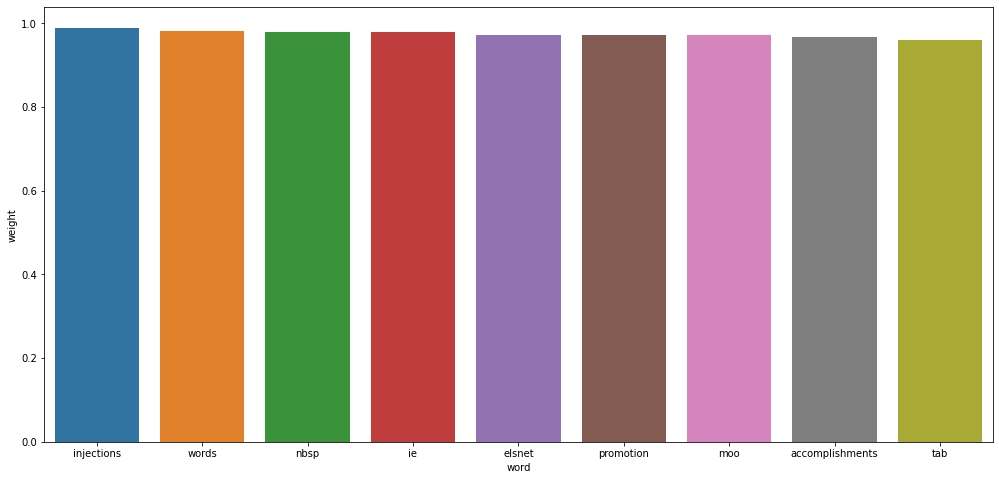

In [106]:
fig, axes = plt.subplots(figsize=(17, 8))

sns.barplot(x='word', y='weight', 
            data= top_n_sort(tfidf_df, 10, 'weight'), ax=axes);

### Train-test splits

We'll train and test our models on two sets of data, one with and one without the features we discussed in the EDA section.

In [107]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, data["Label"], test_size=0.3, random_state=5)

In [108]:
data_tfidf_train

<11786x70000 sparse matrix of type '<class 'numpy.float64'>'
	with 1151909 stored elements in Compressed Sparse Row format>

In [109]:
data_tfidf_test

<5052x70000 sparse matrix of type '<class 'numpy.float64'>'
	with 478638 stored elements in Compressed Sparse Row format>

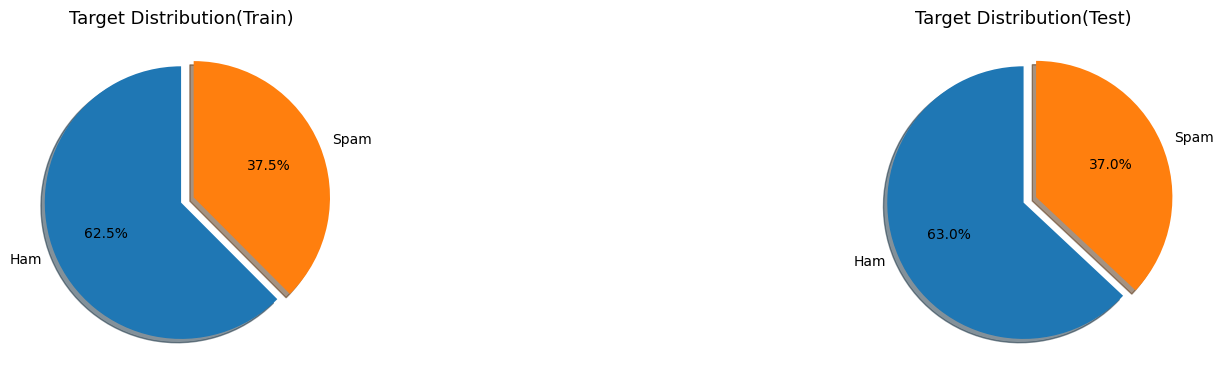

In [110]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

axes[0].pie(label_train.value_counts(), explode=(0, 0.1), labels=["Ham","Spam"], autopct='%1.1f%%',
        shadow=True, startangle=90)

axes[1].pie(label_test.value_counts(), explode=(0, 0.1), labels=["Ham","Spam"], autopct='%1.1f%%',
        shadow=True, startangle=90)

axes[0].set_title('Target Distribution(Train)', fontsize=13)
axes[1].set_title('Target Distribution(Test)', fontsize=13)

plt.show()

In [111]:
data.columns

Index(['Body', 'Label', 'punct_count', 'cl_count', 'nums_count',
       'st_word_count'],
      dtype='object')

In [112]:
features = list(
    set(data.columns)
    - {
        "Body",
        "Label",
    }
)

In [113]:
np.array(data[features])

array([[3.80666249, 0.69314718, 5.98896142, 3.55534806],
       [3.52636052, 0.69314718, 6.04263283, 2.48490665],
       [3.68887945, 0.69314718, 5.35185813, 3.52636052],
       ...,
       [6.7214257 , 6.13772705, 8.14583961, 4.94164242],
       [5.06259503, 4.81218436, 6.93828448, 4.20469262],
       [6.12249281, 5.97635091, 7.84502442, 4.34380542]])

In [124]:
np.shape(data_tfidf)

(16838, 70000)

In [125]:
from scipy.sparse import  hstack
X = hstack((data_tfidf ,np.array(data['punct_count'])[:,None]))

In [126]:
np.shape(X)

(16838, 70001)

In [127]:
X2 = hstack((X ,np.array(data['cl_count'])[:,None]))

In [129]:
del X
np.shape(X2)

(16838, 70002)

In [131]:
X3 = hstack((X2 ,np.array(data['nums_count'])[:,None]))

In [132]:
del X2
np.shape(X3)

(16838, 70003)

In [133]:
X4 = hstack((X3 ,np.array(data['st_word_count'])[:,None])).A

In [134]:
del X3
np.shape(X4)

(16838, 70004)

## <center>Classification model</center>

In this notebook we'll consider and employ <b>Naive Bayes</b> model. So, let's start.

### Naive Bayes

The Bayesian classifier is a type of machine learning algorithm. The bottom line is that the system, when faced with the task of determining whether the next letter is spam, is pre-trained with a set of letters that have been classified as "spam" or "not spam" in advance. It's already clear that this is teacher training, in which we take on the role of a teacher. A document (in this case, a letter) is represented by the Bayesian classifier as a set of words that are supposed to be independent of one another (this is where that naivety comes from).
<p>It's necessary to calculate the score for each class (spam vs. non-spam) and choose the one with the highest score. We use the following formula to do so:

<p><img src="img/nb.png" />
<p><img src="img/nb2.png" />
<p>When the amount of text is very large, you have to work with very small numbers. In order to avoid this, you can transform the formula with the property of the logarithm:
<p><img src="img/nb3.png" />
<p>Substitute and get:
<p><img src="img/nb4.png" />
<p>During the calculations, you may come across a word that was not there at the stage of training the system. This may result in a score of zero and the document cannot be classified into any of the categories (spam / non-spam). As much as you want, you will not train your system to recognize every possible word. To do this, it is necessary to apply anti-aliasing, or rather, make small corrections to all the probabilities of occurrence of words in the document. The parameter 0 <α≤1 is selected (if α = 1, then this is Laplace smoothing) 

<b>MNB</b> model with <b>extra features</b> and <b>without</b> feature scaling: 

In [137]:
X4_train, X4_test, y4_train, y4_test = \
    train_test_split(X4, data["Label"], test_size=0.3, random_state=5)

In [139]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
mnb_with_feat_unsc = MultinomialNB().fit(X4_train, y4_train.values.ravel())
pred_mwfu = mnb_with_feat_unsc.predict(X4_test)

<b>MNB</b> model with <b>extra features</b> and <b>with</b> feature scaling: 

In [181]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [187]:
X4_tfidf_train = X4_train[:,0:70000]
X4_tfidf_test  = X4_test[:,0:70000]
X4_feat_train = X4_train[:,-4:70004]
X4_feat_test  = X4_test[:,-4:70004]

In [188]:
scaler = MinMaxScaler()
X4_tfidf_train = scaler.fit_transform(X4_tfidf_train)
X4_tfidf_test  = scaler.transform(X4_tfidf_test)

In [190]:
scaler = MinMaxScaler()
X4_feat_train = scaler.fit_transform(X4_feat_train)
X4_feat_test  = scaler.transform(X4_feat_test)

In [191]:
X4_train = np.hstack((X4_tfidf_train, X4_feat_train))
X4_test  = np.hstack((X4_tfidf_test,  X4_feat_test))

In [192]:
mnb_with_feat_sc = MultinomialNB().fit(X4_train, y4_train.values.ravel())
pred_mwfs = mnb_with_feat_sc.predict(X4_test)

<b>MNB</b> model without <b>extra features</b> and <b>without</b> feature scaling: 

In [201]:
#delete some objects
del X4_tfidf_train, X4_tfidf_test, X4_feat_train, X4_feat_test

In [202]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [204]:
mnb_without_feat_unsc = MultinomialNB().fit(data_tfidf_train, label_train.values.ravel())
pred_mwtfus = mnb_without_feat_unsc.predict(data_tfidf_test)

<b>MNB</b> model without <b>extra features</b> and <b>with</b> feature scaling: 

In [209]:
del X4_train

In [210]:
scaler = MinMaxScaler()
data_tfidf_train = scaler.fit_transform(data_tfidf_train)
data_tfidf_test  = scaler.transform(data_tfidf_test)

In [211]:
mnb_without_feat_sc = MultinomialNB().fit(data_tfidf_train, label_train.values.ravel())
pred_mwtfs = mnb_without_feat_sc.predict(data_tfidf_test)

## <center>Comparison of results</center>

The first thing we can do with an actual label and a predicted label is divide our samples into four cases:
* <b>True positive</b>: actual = 1, predicted = 1
* <b>False positive</b>: actual = 0, predicted = 1
* <b>False negative</b>: actual = 1, predicted = 0
* <b>True negative</b>: actual = 0, predicted = 0

First we'll build a confusion matrix based on these cases.

### Confusion matrix

Source: https://en.wikipedia.org/wiki/Confusion_matrix 

<p>In the field of machine learning and specifically the problem of statistical classification, a <b>confusion matrix</b>, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In [269]:
from sklearn.metrics import confusion_matrix

In [270]:
conf_mwfu = confusion_matrix(pred_mwfu,y4_test)
conf_mwfs = confusion_matrix(pred_mwfs,y4_test)
conf_mwtfus = confusion_matrix(pred_mwtfus,label_test)
conf_mwtfs = confusion_matrix(pred_mwtfs,label_test)

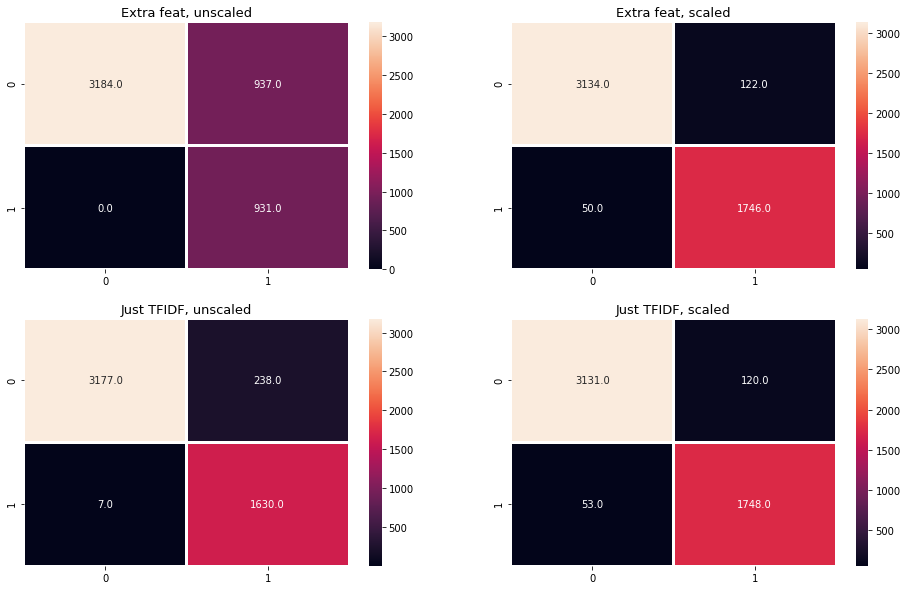

In [274]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
#plt.tight_layout()
sns.heatmap(conf_mwfu,annot=True,fmt=".1f",linewidths=1.5, ax=axes[0][0])
sns.heatmap(conf_mwfs,annot=True,fmt=".1f",linewidths=1.5, ax=axes[0][1])
sns.heatmap(conf_mwtfus,annot=True,fmt=".1f",linewidths=1.5, ax=axes[1][0])
sns.heatmap(conf_mwtfs,annot=True,fmt=".1f",linewidths=1.5, ax=axes[1][1])

axes[0][0].set_title('Extra feat, unscaled', fontsize=13)
axes[0][1].set_title('Extra feat, scaled', fontsize=13)
axes[1][0].set_title('Just TFIDF, unscaled', fontsize=13)
axes[1][1].set_title('Just TFIDF, scaled', fontsize=13)

plt.show()

### Classification metrics: accuracy

Source: https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

The most common metric for classification is <b>accuracy</b>, which is the fraction of samples predicted correctly as shown below:

![title](img/accur.png)

In [292]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'acc': [accuracy_score(y4_test, pred_mwfu), accuracy_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [293]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'acc': [accuracy_score(label_test, pred_mwtfus), accuracy_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

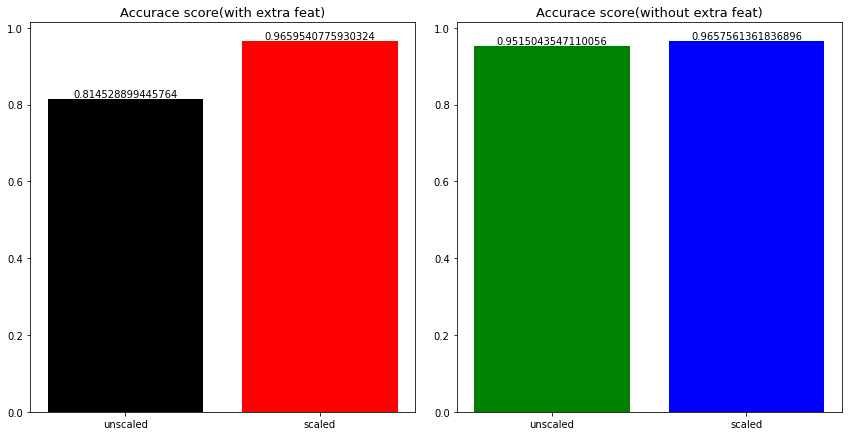

In [294]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['acc'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['acc'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['acc'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['acc'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['acc'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['acc'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Accurace score(with extra feat)', fontsize=13)
axes[1].set_title('Accurace score(without extra feat)', fontsize=13)    
plt.show()

As we can see, the best accuracy score belongs to a model with <b style="color:red;">scaled extra features</b>.

### Classification metrics: recall

<b>Recall</b> (also known as sensitivity) is the fraction of positives events that you predicted correctly as shown below:

<img src="img/recall.png" />

In [275]:
from sklearn.metrics import recall_score

In [295]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'rec': [recall_score(y4_test, pred_mwfu), recall_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [296]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'rec': [recall_score(label_test, pred_mwtfus), recall_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

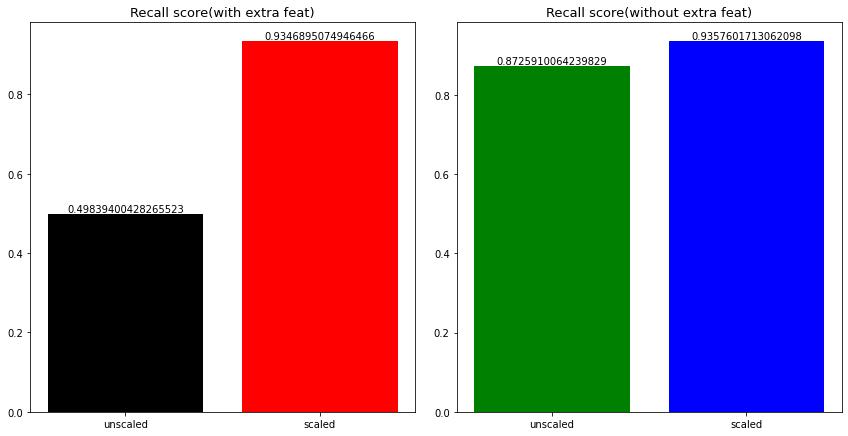

In [297]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['rec'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['rec'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['rec'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['rec'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['rec'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['rec'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Recall score(with extra feat)', fontsize=13)
axes[1].set_title('Recall score(without extra feat)', fontsize=13)    
plt.show()

As we can see, the recall score belongs to a model with <b style="color:blue;">scaled</b> data and <b style="color:blue;">without extra features</b>.

### Classification metrics: precision

<b>Precision</b> is the fraction of predicted positives events that are actually positive as shown below:

<img src="img/precision.png" />

In [298]:
from sklearn.metrics import precision_score

In [299]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'prec': [precision_score(y4_test, pred_mwfu), precision_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [300]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'prec': [precision_score(label_test, pred_mwtfus), precision_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

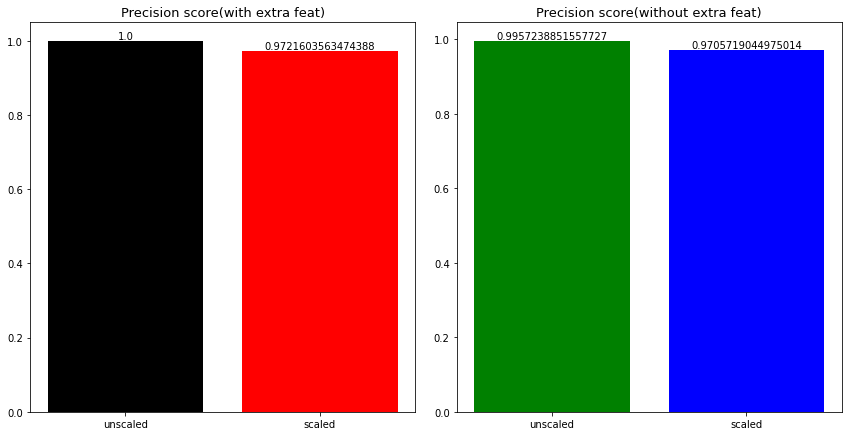

In [301]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['prec'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['prec'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['prec'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['prec'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['prec'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['prec'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('Precision score(with extra feat)', fontsize=13)
axes[1].set_title('Precision score(without extra feat)', fontsize=13)    
plt.show()

As we can see, the best precision score belongs to a model with <b>unscaled extra features</b>.

### Classification metrics: F1

The <b>F1</b> score is the harmonic mean of the precision and recall.

<img src="img/f1.png" />

In [284]:
from sklearn.metrics import f1_score

In [302]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'f1': [f1_score(y4_test, pred_mwfu), f1_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [303]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'f1': [f1_score(label_test, pred_mwtfus), f1_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

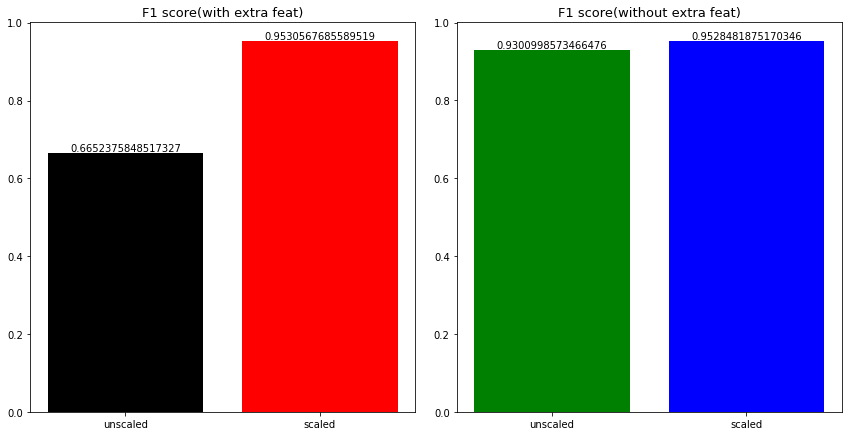

In [304]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.tight_layout()

axes[0].bar(df_wf_res['m_name'],df_wf_res['f1'], color=['black', 'red'])
axes[1].bar(df_wtf_res['m_name'],df_wtf_res['f1'], color=['green', 'blue'])

for i in range(2):
    axes[0].annotate(str(df_wf_res['f1'][i]), xy=(df_wf_res['m_name'][i],df_wf_res['f1'][i]), 
                                                                   ha='center', va='bottom')
for i in range(2):
    axes[1].annotate(str(df_wtf_res['f1'][i]), xy=(df_wtf_res['m_name'][i],df_wtf_res['f1'][i]), 
                                                                   ha='center', va='bottom')

axes[0].set_title('F1 score(with extra feat)', fontsize=13)
axes[1].set_title('F1 score(without extra feat)', fontsize=13)    
plt.show()

As we can see, the best f1 score belongs to a model with <b style="color:red;">scaled extra features</b>.

### Classification metrics: ROC-AUC

The balance between true-positive and false-positive rates can be better understood using ROC curves.
<p>Wikipedia says: A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). Example of ROC curve:

<img src="img/roc.png" />

The area under the curve, is referred to as the ROC score, and thus the name <b>Area Under the Curve</b> (aka AUC). Generally, the larger the area under the curve, the better the model performs.
<p>For better understanding, I recommend watching this video.: https://www.youtube.com/watch?v=4jRBRDbJemM

In [305]:
from sklearn.metrics import roc_auc_score

In [310]:
dr1 = {'m_name': ["unscaled", "scaled"], 
       'auc_score': [roc_auc_score(y4_test, pred_mwfu), roc_auc_score(y4_test, pred_mwfs)]}
df_wf_res = pd.DataFrame(data=dr1)

In [311]:
dr2 = {'m_name': ["unscaled", "scaled"], 
       'auc_score': [roc_auc_score(label_test, pred_mwtfus), roc_auc_score(label_test, pred_mwtfs)]}
df_wtf_res = pd.DataFrame(data=dr2)

In [308]:
from sklearn.metrics import roc_curve

In [309]:
fpr_mwfu, tpr_mwfu, thresholds_mwfu = roc_curve(y4_test, pred_mwfu)
fpr_mwfs, tpr_mwfs, thresholds_mwfs = roc_curve(y4_test, pred_mwfs)
fpr_mwtfus, tpr_mwtfus, thresholds_mwtfus = roc_curve(label_test, pred_mwtfus)
fpr_mwtfs, tpr_mwtfs, thresholds_mwtfs = roc_curve(label_test, pred_mwtfs)

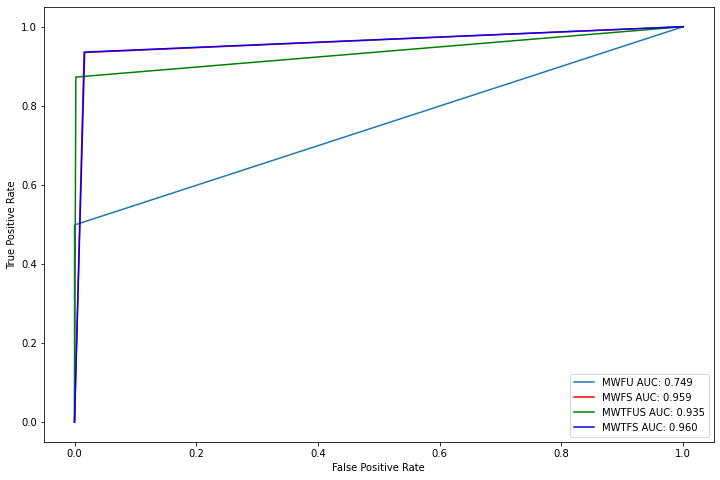

In [315]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.plot(fpr_mwfu, tpr_mwfu, label = 'MWFU AUC: %.3f'%dr1['auc_score'][0])
axes.plot(fpr_mwfs,tpr_mwfs,'r-', label= 'MWFS AUC: %.3f'%dr1['auc_score'][1])
axes.plot(fpr_mwtfus,tpr_mwtfus,'g-', label= 'MWTFUS AUC: %.3f'%dr2['auc_score'][0])
axes.plot(fpr_mwtfs,tpr_mwtfs,'b-', label= 'MWTFS AUC: %.3f'%dr2['auc_score'][1])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see, the best roc_auc score belongs to a model with <b style="color:blue;">scaled</b> data and <b style="color:blue;">without extra features</b>.